<a href="https://colab.research.google.com/github/Koalananas/pythonfordata/blob/master/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time
from sklearn.metrics import plot_confusion_matrix

#Import

In [72]:
labels = pd.read_csv("https://raw.githubusercontent.com/Koalananas/pythonfordata/master/datas/features.txt", header=None)
l = labels[0].tolist()
labels = []
i = 0
for la in l:
  i += 1
  la = la.replace(" ", "")
  while(la in labels):
    la = la+"x"
  labels.append(i)

train_x = pd.read_csv("https://raw.githubusercontent.com/Koalananas/pythonfordata/master/datas/Train/X_train.txt"," ", header=None, names=labels)
train_y = pd.read_csv("https://raw.githubusercontent.com/Koalananas/pythonfordata/master/datas/Train/y_train.txt"," ", header=None, names=['y_target'])
train  = pd.concat([train_x, train_y], axis=1)

test_x = pd.read_csv("https://raw.githubusercontent.com/Koalananas/pythonfordata/master/datas/Test/X_test.txt"," ", header=None, names=labels)
test_y = pd.read_csv("https://raw.githubusercontent.com/Koalananas/pythonfordata/master/datas/Test/y_test.txt"," ", header=None, names=['y_target'])
test  = pd.concat([test_x, test_y], axis=1)

df = pd.concat([train, test])
df.shape

(10929, 562)

In [0]:
mainTarget =  train['y_target']==2002

#Visualisation

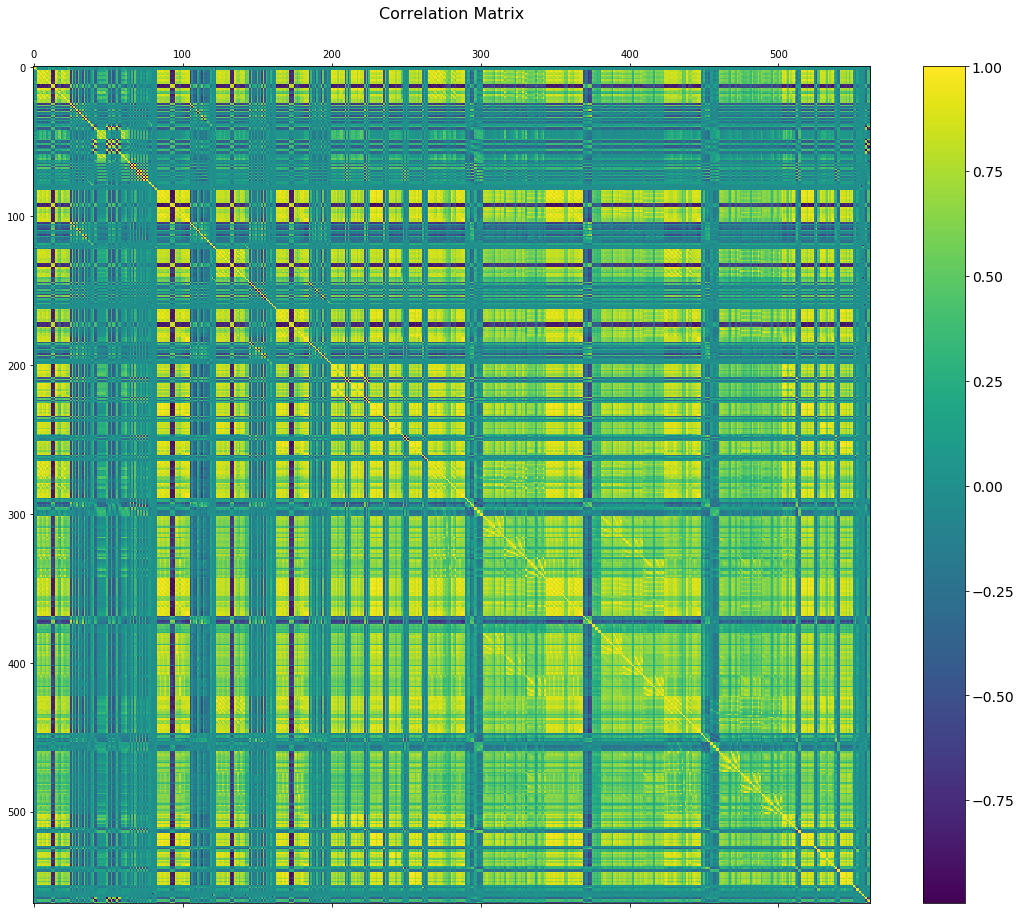

In [76]:
#test correlation matrix
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

plt.show()

#Models

Précision : 0.9535104364326376, temps : 9.435485999999855


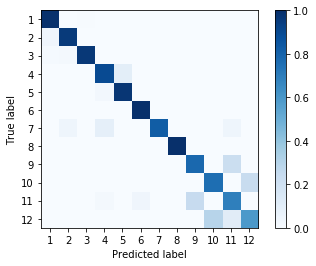

In [37]:
def svm(trainx, trainy, testx, testy):
  from sklearn import svm
  time_start = time.clock()
  clf = svm.SVC(gamma=0.001, C=100., decision_function_shape='ovr', 
                random_state=22)
  clf.fit(trainx, trainy.values.ravel())
  predictions = clf.predict(testx)
  i = 0
  accuracy =0
  for res in predictions:
    if res == testy.loc[i, "y_target"]:
      accuracy +=1
    i+=1
  accuracy = (accuracy/i)
  time_elapsed = (time.clock() - time_start)
  return [clf, accuracy, time_elapsed]

svm(train_x, train_y, test_x, test_y)[1]
sv = svm(train_x, train_y, test_x, test_y)
print("Précision : " + str(sv[1]) + ", temps : " + str(sv[2]) )
disp = plot_confusion_matrix(sv[0], test_x, test_y,
  cmap=plt.cm.Blues,
  normalize="true",include_values=False)

Précision : 0.9092346616065781, temps : 33.36913100000015


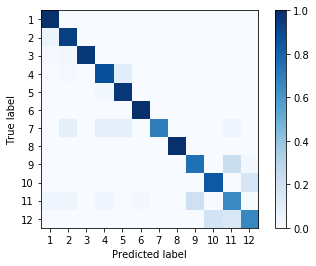

In [35]:
def rfc(trainx, trainy, testx, testy):
  from sklearn.ensemble import RandomForestClassifier
  time_start = time.clock()
  rfc = RandomForestClassifier(n_estimators = 200)
  rfc.fit(trainx,trainy.values.ravel())
  predictions = rfc.predict(testx)
  i = 0
  accuracy =0
  for res in predictions:
    if res == testy.loc[i, "y_target"]:
      accuracy +=1
    i+=1
  accuracy = (accuracy/i)
  time_elapsed = (time.clock() - time_start)
  return [logres, accuracy, time_elapsed]

rf = rfc(train_x, train_y, test_x, test_y)
print("Précision : " + str(rf[1]) + ", temps : " + str(rf[2]) )
disp = plot_confusion_matrix(rf[0], test_x, test_y,
  cmap=plt.cm.Blues,
  normalize="true",include_values=False)

Précision : 0.9468690702087287, temps : 53.197623999999905


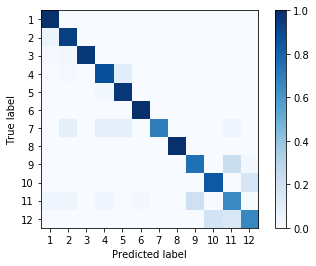

In [40]:
def logreg(trainx, trainy, testx, testy):
  from sklearn.linear_model import LogisticRegression
  time_start = time.clock()
  logres = LogisticRegression(solver='lbfgs', multi_class="ovr",
                              max_iter=1000)
  logres.fit(trainx, trainy.values.ravel())
  predictions = logres.predict(testx)
  i = 0
  accuracy =0
  for res in predictions:
    if res == testy.loc[i, "y_target"]:
      accuracy +=1
    i+=1
  accuracy = (accuracy/i)
  time_elapsed = (time.clock() - time_start)
  confusion_matrix(testy, predictions)
  return [logres, accuracy, time_elapsed]

logres = logreg(train_x, train_y, test_x, test_y)
print("Précision : " + str(logres[1]) + ", temps : " + str(logres[2]) )
disp = plot_confusion_matrix(logres[0], test_x, test_y,
  cmap=plt.cm.Blues,
  normalize="true",include_values=False)

#Export model

In [0]:
modellog = logreg(train_x, train_y, test_x, test_y)[0]
with open("pythonfordata/models/model", 'wb') as file:
            pickle.dump(modellog, file)

#Tunning

In [0]:
def svmr(trainx, trainy, testx, testy, classifier):
  
  time_start = time.clock()
  classifier.fit(trainx, trainy.values.ravel())
  predictions = classifier.predict(testx)
  i = 0
  accuracy =0
  for res in predictions:
    if res == testy.loc[i, "y_target"]:
      accuracy +=1
    i+=1
  accuracy = (accuracy/i)
  time_elapsed = (time.clock() - time_start)
  confusion_matrix(testy, predictions)
  return [accuracy, time_elapsed]

from sklearn import svm
maxiter = [1000, 1500, 2000, 2500, 3000]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
cc = [0.1,1,10,100,1000]
tol = [0.1, 0.01, 0.001, 0.0001, 0.00001,0.00000001]

maxiterres = []
for m in tol:
  print(m)
  svmres = svm.SVC(gamma=0.001, C=100., decision_function_shape='ovr', random_state=22, max_iter=2500, kernel='rbf', tol=0.0001)
  res = svmr(train_x, train_y, test_x, test_y, svmres)
  maxiterres.append(res[0])

print("tol : " + str(tol))
print("acc : " + str(maxiterres))

In [71]:
from decimal import Decimal
tmp = []
for m in maxiterres:
  m = Decimal(m)
  m = round(m, 4)
  m = float(m)
  tmp.append(m)
maxiterres = tmp

print("tol : " + str(tol))
print("acc : " + str(maxiterres))

tol : [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-08]
acc : [0.9529, 0.9535, 0.9535, 0.9538, 0.9538, 0.9538]
